## 1. 개요
<br>

과거로부터 화폐는 항상 금과 은에서 시작되었습니다.  
금, 은에 대한 교환을 보증서나 동전으로 화폐화하여 거래하였으며  
화폐 가치가 상실되면 금, 은으로 회귀되었습니다.

금과 은은 화폐의 기초가 되는 주요한 투자 상품이며   
수요와 공급의 균형에 따라 일정한 가격대를 서로 유지합니다.

이 상관관계를 밝혀내서 금, 은 투자에 있어 일종의 지표가 되는 AI를 개발하고자 하였습니다.  
그것이 금 은 퀀트 투자 AI 프로젝트 입니다.

--------------------

## 2. 데이터 수집 및 정제
<br>

저희는 우선 https://www.kitco.com/gold.londonfix.html 로부터   
1년 동안의 은, 금 가격 daily 데이터를 받아서 엑셀로 데이터 정제를 하였습니다.


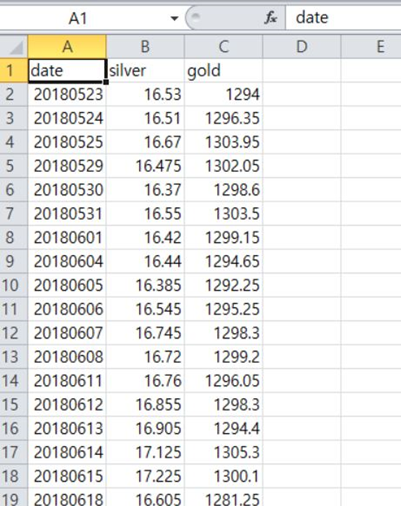

‘2018-05-23’처럼 날짜 형식이면 추후 숫자로 인식 시 오류가 나기 때문에 엑셀의
‘텍스트 나누기’ 기능을 사용하여 적절히 정제하면 되겠습니다.   
 ‘silver gold data.csv’ 로 저장하였습니다.
 
 ------------------

## 3. 학습모델 생성 및 저장

In [10]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv
# 텐서플로우와 넘파이, 판다스를 불러옵니다.
# 텐서플로우는 머신러닝 라이브러리, 넘파이와 판다스는 데이터분석 라이브러리입니다.
# 판다스를 통해 read_csv기능을 불러와 저희가 정제한 csv파일을 읽습니다.

model = tf.global_variables_initializer();

data = read_csv('silver gold data.csv', sep=',')

xy = np.array(data, dtype=np.float32)

x_data = xy[:, 1:-1]
y_data = xy[:, [-1]]
# 저희 csv파일은 3열으로 x_data는 현재 2번째 열을 가져오며, y_data는 3번째 열을 가져오겠습니다.
W = tf.Variable(tf.random_uniform([1]), name="weight")
b = tf.Variable(tf.random_uniform([1]), name="bias")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# X, Y 플레이스 홀더와 가중치와 바이어스를 설정합니다.
# 변인이 1개인 단순 선형 회귀이므로 값이 하나인 1차원 Array Shape을 가집니다.
hypothesis = W * X + b
# hypothesis = tf.matmul(X, W) + b로 표현하면 오류가 납니다.
# matmul은 변인이 2개 이상(또는 rank가 2이상)일 때 사용하는 것으로
# 단순선형회귀에서는 변인이 1개(또는 rank가 1)이기 때문에 y = Wx + b 형태로 만들어야 합니다.

cost = tf.reduce_mean(tf.square(hypothesis - Y))
# 비용 함수를 설정합니다.

rate = tf.Variable(0.0000005)
optimizer = tf.train.GradientDescentOptimizer(rate)
train = optimizer.minimize(cost)
# 이는 최적화 함수로, 학습률을 5 x 10^-7로 조정하고, 
# optimizer로 cost함수를 작게하겠다는 의미입니다.
# 텐서플로우에서 학습하면서 자동으로 W와 b값을 최소화합니다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 세션을 생성하고, 글로벌 변수를 초기화한 후에,
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)
        print("- 금 가격: ", hypo_[0])
        # 100001번의 학습을 수행하였습니다, 500steps 마다 step, 비용함수, 가설을 출력합니다.

# 0  손실 비용:  1545796.5
- 금 가격:  [15.995435]
# 500  손실 비용:  1226291.4
- 금 가격:  [163.92365]
# 1000  손실 비용:  972912.44
- 금 가격:  [295.6574]
# 1500  손실 비용:  771973.7
- 금 가격:  [412.9699]
# 2000  손실 비용:  612621.94
- 금 가격:  [517.43976]
# 2500  손실 비용:  486250.88
- 금 가격:  [610.4724]
# 3000  손실 비용:  386033.94
- 금 가격:  [693.32056]
# 3500  손실 비용:  306558.4
- 금 가격:  [767.0989]
# 4000  손실 비용:  243531.28
- 금 가격:  [832.80054]
# 4500  손실 비용:  193548.7
- 금 가격:  [891.3094]
# 5000  손실 비용:  153910.89
- 금 가격:  [943.4128]
# 5500  손실 비용:  122476.49
- 금 가격:  [989.8125]
# 6000  손실 비용:  97547.97
- 금 가격:  [1031.1324]
# 6500  손실 비용:  77778.87
- 금 가격:  [1067.9288]
# 7000  손실 비용:  62101.2
- 금 가격:  [1100.6969]
# 7500  손실 비용:  49668.246
- 금 가격:  [1129.8778]
# 8000  손실 비용:  39808.44
- 금 가격:  [1155.8644]
# 8500  손실 비용:  31989.291
- 금 가격:  [1179.0059]
# 9000  손실 비용:  25788.576
- 금 가격:  [1199.6134]
# 9500  손실 비용:  20871.08
- 금 가격:  [1217.9653]
# 10000  손실 비용:  16971.283
- 금 가격:  [1234.3083]
# 10500  손실 비용:  13878.691
- 금 가

# 86500  손실 비용:  2028.0985
- 금 가격:  [1367.0504]
# 87000  손실 비용:  2028.0964
- 금 가격:  [1367.051]
# 87500  손실 비용:  2028.0941
- 금 가격:  [1367.0518]
# 88000  손실 비용:  2028.0918
- 금 가격:  [1367.0525]
# 88500  손실 비용:  2028.0894
- 금 가격:  [1367.0532]
# 89000  손실 비용:  2028.087
- 금 가격:  [1367.054]
# 89500  손실 비용:  2028.0846
- 금 가격:  [1367.0547]
# 90000  손실 비용:  2028.0825
- 금 가격:  [1367.0554]
# 90500  손실 비용:  2028.0803
- 금 가격:  [1367.056]
# 91000  손실 비용:  2028.0779
- 금 가격:  [1367.0568]
# 91500  손실 비용:  2028.0756
- 금 가격:  [1367.0575]
# 92000  손실 비용:  2028.0731
- 금 가격:  [1367.0582]
# 92500  손실 비용:  2028.0709
- 금 가격:  [1367.059]
# 93000  손실 비용:  2028.0682
- 금 가격:  [1367.0597]
# 93500  손실 비용:  2028.0659
- 금 가격:  [1367.0604]
# 94000  손실 비용:  2028.0638
- 금 가격:  [1367.061]
# 94500  손실 비용:  2028.0618
- 금 가격:  [1367.0618]
# 95000  손실 비용:  2028.0593
- 금 가격:  [1367.0625]
# 95500  손실 비용:  2028.0569
- 금 가격:  [1367.0632]
# 96000  손실 비용:  2028.0547
- 금 가격:  [1367.064]
# 96500  손실 비용:  2028.0521
- 금 가격:  [1367.0647]

In [3]:
saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.cpkt")
print('학습된 모델을 저장했습니다.')
# 학습된 모델을 저장했습니다.

학습된 모델을 저장했습니다.


---------------------

## 4. 데이터 시각화

<br>
은과 금 가격의 선형회귀에 대해 
확인하기 위해 데이터 시각화를 해보겠습니다.

In [1]:
%%writefile plot_hour2grade.py

import matplotlib.pyplot as plt  
%matplotlib inline
# 그래프를 출력하기 위해 맷플랏라이브러리를 불러왔습니다.

Overwriting plot_hour2grade.py


In [4]:
mx = np.mean(x_data)
my = np.mean(y_data)
print("x의 평균값:", mx)
print("y의 평균값:", my)
# x_data와 y_data로부터 값을 불러와

divisor = sum([(mx - i)**2 for i in x_data])
# 기울기 공식의 분모를 정하고

def top(x_data, mx, y_data, my):
    d = 0
    for i in range(len(x_data)):
        d += (x_data[i] - mx) * (y_data[i] - my)
    return d
dividend = top(x_data, mx, y_data, my)
# 기울기 공식의 분자를 정합니다.
print("분모:", divisor)
print("분자:", dividend)

a = dividend / divisor
b = my - (mx*a)
# 기울기와 y 절편을 구하고

print("기울기 a =", a)
print("y 절편 b =", b)

xline = np.arange(12, 18, 0.1)
yline = a * xline + b
# 은과 금 가격의 그래프에서 범위를 적절히 조정하였습니다.

x의 평균값: 15.1776285
y의 평균값: 1257.3325
분모: [127.06607]
분자: [4856.692]
기울기 a = [38.221783]
y 절편 b = [677.2165]


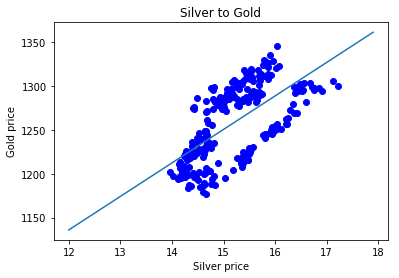

In [7]:
plt.figure()  
plt.plot(x_data, y_data, 'ob')  
plt.plot(xline, yline)
plt.title('Silver to Gold')
plt.xlabel('Silver price')
plt.ylabel('Gold price')
plt.show()
# 보시면 은과 금 가격의 규칙성 있는 분포도를 확인할 수 있으며
# 수요와 공급의 원리에 따라 이루어진 상관관계로부터 선형회귀를 확인할 수 있겠습니다.
# plt가 지정되지 않았다는 오류가 뜬다면 'import matplotlib.pyplot as plt'를 맨 앞 줄에 작성하여 실행 후
# 다시 제거하여 실행하면 오류가 해결됩니다. 이와 같은 경우에 변수를 def하여 plt를 한꺼번에 작동시키는 편이나 이것 또한 오류가 발생하여
# plt를 직접 사용하였습니다.